In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
from run_model import Runner, get_statistics, plot_mean_and_standard_deviation

import os
os.getcwd()

'C:\\Users\\guido\\master CLS\\agent based modelling\\project\\ABM_Group'

In [3]:
# read data and get mean and standard deviation
wolves20 = pd.read_csv('results_data\model_result_20wolves.csv')
wolves0 = pd.read_csv('results_data\model_result_0wolves.csv')

mean20, std20 = get_statistics(wolves20)
mean0, std0 = get_statistics(wolves0)

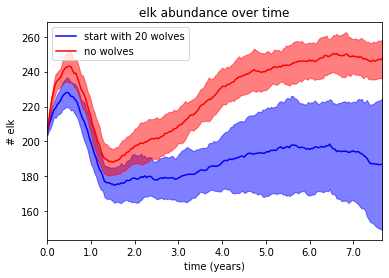

[LeveneResult(statistic=0.007204968944099423, pvalue=0.9326474526212717), LeveneResult(statistic=0.08499455007872128, pvalue=0.7716798556332918), LeveneResult(statistic=1.5963641657416348, pvalue=0.21147434832306522), LeveneResult(statistic=0.16298155959678307, pvalue=0.6879107882928115), LeveneResult(statistic=0.8526486009702555, pvalue=0.3596297621707739), LeveneResult(statistic=0.11812790955442226, pvalue=0.7323167169218039), LeveneResult(statistic=5.805277525022746, pvalue=0.019172883626935495), LeveneResult(statistic=5.623347630744951, pvalue=0.0210643104967916), LeveneResult(statistic=6.009964603668349, pvalue=0.017258683030729423), LeveneResult(statistic=8.10707058348525, pvalue=0.006088648288610872)]
time steps in months where I tested: [0.5, 10.5, 20.5, 30.5, 40.5, 50.5, 60.5, 70.5, 80.5, 90.5]


In [15]:
# timesteps
x = np.linspace(0,200, 200)

plt.plot(x, mean20['elk'], color='blue', label='start with 20 wolves')
plt.fill_between(x, mean20['elk']-std20['elk'], mean20['elk']+std20['elk'], color='blue', alpha=0.5)

plt.plot(x, mean0['elk'], color='red', label='no wolves')
plt.fill_between(x, mean0['elk']-std0['elk'], mean0['elk']+std0['elk'], color='red', alpha=0.5)

# use xticks for whole years
old_ticks = [x[i] for i in np.arange(0, max(x), 26, dtype=int)]
ticks = [round(x_val/26, 1) for x_val in x]
new_ticks = [ticks[i] for i in np.arange(0, max(x)-1, 26, dtype=int)]

plt.xticks(old_ticks, new_ticks)
plt.xlabel('time (years)')
plt.ylabel('# elk')
plt.xlim(0, len(x))
plt.legend()
plt.savefig('result_graphs\with or without wolves.pdf')
plt.title('elk abundance over time')
plt.show()

# select elk population size and different times
elk0 = [wolves0.loc[wolves0['step'] == i]['elk'] for i in range(1, len(x), 20)]
elk20 = [wolves20.loc[wolves20['step'] == i]['elk'] for i in range(1, len(x), 20)]

# perform Levene test for equal variances at certain timesteps
print([st.levene(size0, size20) for size0, size20 in zip(elk0, elk20)])
print('time steps in months where I tested:', [i/2 for i in range(1, len(x), 20)])

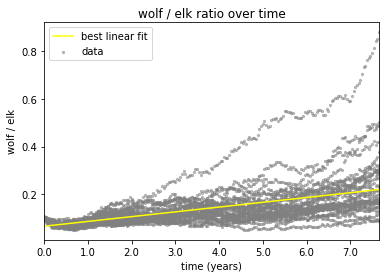

WilcoxonResult(statistic=464.0, pvalue=0.9999990395394476)


In [17]:
# 30x200 array where every row is the wolf/elk in a run with 200 steps
wolf_elk = []
step = []
for i in range(len(wolves20)):
    if (i % 200 == 0 and i != 0):
        wolf_elk.append(np.array(step))
        step = []
    step.append(wolves20.loc[i]['wolf'] / wolves20.loc[i]['elk'])   
    
wolf_elk.append(np.array(step))
wolf_elk = np.array(wolf_elk)

# mean and standard deviation
ratio_std = np.std(wolf_elk, axis=0)
ratio_mean = np.mean(wolf_elk, axis=0)

# runs x steps array of timesteps
X = np.array([x for i in range(wolf_elk.shape[0])])

# linear regression on all 30 runs
slopes = [st.linregress(x, ratio)[0] for x, ratio in zip(X, wolf_elk)]
intercepts = [st.linregress(x, ratio)[1] for x, ratio in zip(X, wolf_elk)]

plt.plot(x, np.mean(intercepts)+np.mean(slopes)*x, label='best linear fit', color='yellow')

plt.scatter(X.ravel(), wolf_elk.ravel(), color='grey', s=5, alpha=0.5, label='data')
plt.xticks(old_ticks, new_ticks)
plt.xlim(0, 200)
plt.xlabel('time (years)')
plt.ylabel('wolf / elk')
plt.legend()
plt.savefig('result_graphs/wolf elk ration.pdf')
plt.title('wolf / elk ratio over time')
plt.show()

# Wilcoxon signed rank-test which tests the null-hypothesis that the distribution of slopes is positive
print(st.wilcoxon(slopes, alternative='less'))

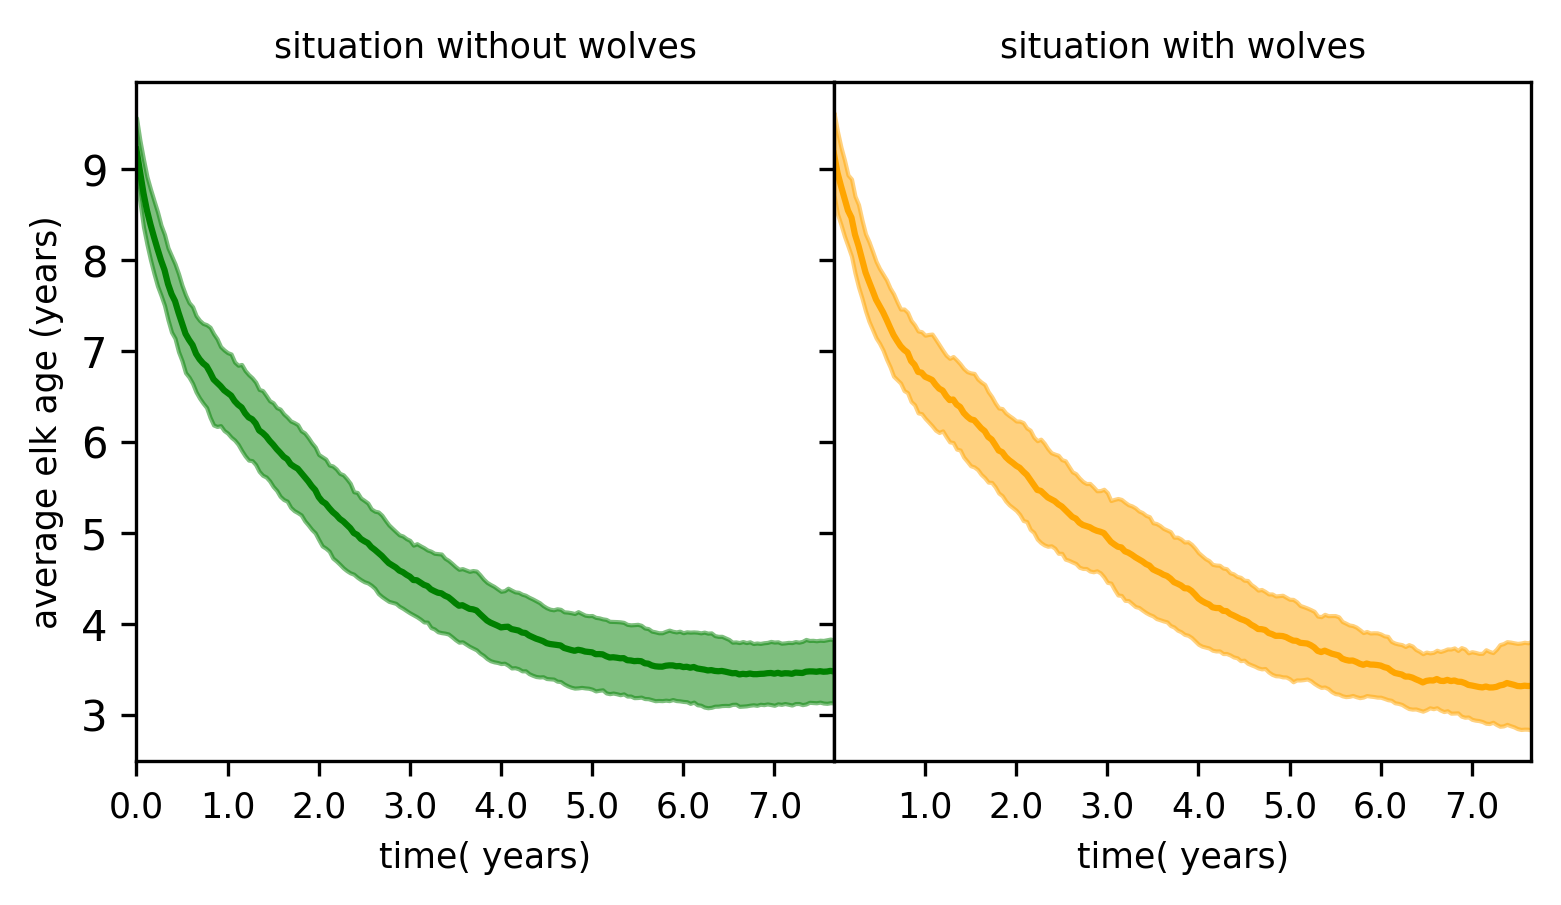

In [18]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(6, 3), dpi=300, sharey=True)
fontsize = 'small'

ax1.plot(x, mean0['average_elk_age'], color='green', label='no wolves')
ax1.fill_between(x, mean0['average_elk_age']-std0['average_elk_age'], mean0['average_elk_age']+std0['average_elk_age'], 
                color='green', alpha=0.5)
ax1.set_xticks(old_ticks)
ax1.set_xticklabels(new_ticks, fontsize=fontsize)
ax1.set_xlim(0, 200)
ax1.set_ylabel('average elk age (years)', fontsize=fontsize)
ax1.set_title('situation without wolves', fontsize=fontsize)

ax2.plot(x, mean20['average_elk_age'], color='orange')
ax2.fill_between(x, mean20['average_elk_age']-std20['average_elk_age'], mean20['average_elk_age']+std20['average_elk_age'], 
                color='orange', alpha=0.5)
ax2.set_xticks(old_ticks[1:])
ax2.set_xticklabels(new_ticks[1:], fontsize=fontsize)
ax2.set_xlim(0, 200)
ax2.set_title('situation with wolves', fontsize=fontsize)

ax1.set_xlabel('time( years)', fontsize=fontsize)
ax2.set_xlabel('time( years)', fontsize=fontsize)

plt.subplots_adjust(wspace=0)
plt.savefig('result_graphs\elk age time serie.pdf')
plt.show()

In [14]:
# store elk age df as a run x steps array
wolf0, wolf20 = [], []
step0, step20 = [], []
for i in range(len(wolves20)):
    if (i % 200 == 0 and i != 0):
        wolf0.append(np.array(step0))
        wolf20.append(np.array(step20))
        step0 = []
        step20 = []

    step0.append(wolves0.loc[i]['average_elk_age'])
    step20.append(wolves20.loc[i]['average_elk_age'])

    
wolf0.append(np.array(step0))
wolf0 = np.array(wolf0)
wolf20.append(np.array(step20))
wolf20 = np.array(wolf20)

# perform T-tests for having the same mean at 10 indices
p_values = [st.ttest_ind(wolf0[:, i], wolf20[:, i]) for i in range(0, len(x), 20)]
print((p_values))

[Ttest_indResult(statistic=0.42432170458297996, pvalue=0.6729010145274221), Ttest_indResult(statistic=-1.5372026605627465, pvalue=0.12968161027644584), Ttest_indResult(statistic=-2.5270577598780495, pvalue=0.014251174705179347), Ttest_indResult(statistic=-2.4473466674526207, pvalue=0.017440538467036498), Ttest_indResult(statistic=-3.3844709062342533, pvalue=0.0012842536783078133), Ttest_indResult(statistic=-2.9540858055580896, pvalue=0.004524367464793106), Ttest_indResult(statistic=-1.8812346687146055, pvalue=0.0649624002449128), Ttest_indResult(statistic=-1.0205833466065506, pvalue=0.3116901151684912), Ttest_indResult(statistic=0.5196683866406616, pvalue=0.605272432155102), Ttest_indResult(statistic=1.1794205296365616, pvalue=0.2430461007986578)]
